In [37]:
import pandas as pd

table = pd.read_csv("clients.csv") # Import the database.
display(table)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [38]:
# check if we have empty values or values recognized in the wrong format
print(table.info())
print(table.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

# AI Project: Artificial Intelligence and Predictions

### Case: Score de Crédito dos Clientes

Case: Customer Credit Scores

You have been hired by a bank to determine the credit scores of its customers. Your task is to analyze all the bank's customers and, based on this analysis, create a model that can automatically assess customer information and assign a credit score: Poor, Okay, Good.

files: https://drive.google.com/drive/folders/1FbDqVq4XLvU85VBlVIMJ73p9oOu6u2-J?usp=drive_link

In [39]:
from sklearn.preprocessing import LabelEncoder
# this will transform categorical text columns into numerical values.
# for example, the 'profession' column might be converted from ['scientist', 'teacher', 'mechanic'] to [0, 1, 2].
# this step is important because most machine learning models require numerical input.

encoders = {}  # Store one encoder per column

# we won't apply encoding to the 'score_credito' column since it is our target variable.
for column in table.columns:
    if table[column].dtype == "object" and column != "score_credito":
        le = LabelEncoder()
        table[column] = le.fit_transform(table[column])
        encoders[column] = le  # Save encoder for later use

# check to ensure that all applicable columns have been transformed.
print(table.info())
display(table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,2,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,0,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,2,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,0,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,3,319.164979,Standard,1,0,0,0,1


In [40]:
# selecting the columns to use for training the model
# 'y' is the target column — the one we want the model to predict
# 'x' contains the features used to make the prediction; we exclude 'id_cliente' because it's just a random identifier and doesn't provide useful information
x = table.drop(["score_credito", "id_cliente"], axis=1)
y = table["score_credito"]

from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing sets
# the training set is used to teach the model, while the testing set is used to evaluate how well the model learned
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arvore = RandomForestClassifier()  #  Random Forest model (based on decision trees)
modelo_knn = KNeighborsClassifier()  # KNN model (k-nearest neighbors)

# Training the models
modelo_arvore.fit(x_train, y_train)
modelo_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# What would the accuracy be if the model always predicted the most common class ("Standard")?
score_counts = table["score_credito"].value_counts()
print(score_counts['Standard'] / sum(score_counts))

0.53174


In [43]:
from sklearn.metrics import accuracy_score

# generate predictions using the trained models
prediction_tree = modelo_arvore.predict(x_test)
prediction_knn = modelo_knn.predict(x_test.to_numpy())

# compare the predictions to the actual labels (y_test)
# we want these accuracy scores to be as high as possible,
# but most importantly, they should outperform the naive "Standard" guess
print("Random Forest accuracy:", accuracy_score(y_test, prediction_tree))
print("KNN accuracy:", accuracy_score(y_test, prediction_knn))



/home/gilson/Workflow/machine-learning/supervised-learning/decision-trees-and-kNN/ex01/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Random Forest accuracy: 0.8258
KNN accuracy: 0.7324


In [44]:
from sklearn.metrics import classification_report

print("Random Forest Report:")
print(classification_report(y_test, prediction_tree))

print("KNN Report:")
print(classification_report(y_test, prediction_knn))

Random Forest Report:
              precision    recall  f1-score   support

        Good       0.79      0.79      0.79      5327
        Poor       0.81      0.85      0.83      8683
    Standard       0.85      0.83      0.84     15990

    accuracy                           0.83     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.83      0.83      0.83     30000

KNN Report:
              precision    recall  f1-score   support

        Good       0.61      0.62      0.61      5327
        Poor       0.74      0.78      0.76      8683
    Standard       0.77      0.75      0.76     15990

    accuracy                           0.73     30000
   macro avg       0.71      0.71      0.71     30000
weighted avg       0.73      0.73      0.73     30000



In [47]:
# Load new data for prediction
new_clients = pd.read_csv("new_clients.csv")

# Display the data
display(new_clients)

# Apply the saved encoders to match training format
for column in new_clients.columns:
    if column in encoders:
        le = encoders[column]
         # Filter out rows with unseen labels (important for safe transformation)
        new_clients = new_clients[new_clients[column].isin(le.classes_)]
        new_clients[column] = le.transform(new_clients[column]) # ✅ uses the correct encoder

# Prepare features by dropping target and identifier columns
x_new = new_clients.drop(["score_credito", "id_cliente"], axis=1)

# Predict using the trained model
predictions = modelo_arvore.predict(x_new)

# Output the predictions
print(predictions)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,10314,4,34,advogado,131313.40,0,1,8,2,0,...,370,86.566388,alto_gasto_pagamento_medio,899.198772,Good,0,1,0,1,0
1,10314,5,34,advogado,131313.40,0,1,8,2,0,...,371,86.566388,alto_gasto_pagamento_alto,963.254819,Good,0,1,0,1,0
2,3392,3,23,cientista,19114.12,3,4,3,4,3,...,267,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,8625,7,28,professor,34847.84,2,4,6,1,3,...,325,39.684018,alto_gasto_pagamento_medio,464.880678,Good,0,0,0,1,0
4,8625,8,28,professor,34847.84,2,4,6,1,3,...,326,39.684018,baixo_gasto_pagamento_baixo,356.078109,Good,0,0,0,1,0
5,11708,1,34,engenheiro,143162.64,1,5,8,3,5,...,213,168.413703,alto_gasto_pagamento_baixos,1043.315978,Good,1,0,0,0,0
6,11708,2,34,engenheiro,143162.64,1,5,8,3,13,...,214,168.413703,alto_gasto_pagamento_baixos,998.869297,Good,1,0,0,0,0
7,11708,3,34,engenheiro,143162.64,1,5,8,3,8,...,215,168.413703,alto_gasto_pagamento_baixos,715.741367,Good,1,0,0,0,0
8,11708,4,34,engenheiro,143162.64,1,5,8,3,8,...,216,168.413703,baixo_gasto_pagamento_medio,426.513411,Good,1,0,0,0,0
9,11708,5,34,engenheiro,143162.64,1,5,8,3,10,...,217,168.413703,baixo_gasto_pagamento_alto,810.782153,Good,1,0,0,0,0


['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good']


In [ ]:
# What are the most important features in determining credit score?

# Get the feature names
columns = list(x_test.columns)

# Get feature importances from the trained Random Forest model
importance = pd.DataFrame(index=columns, data=modelo_arvore.feature_importances_)

# Convert to percentage scale for easier interpretation
importance *= 100

# Display the importance of each feature
print(importance.sort_values(by=0, ascending=False))


                                  0
mes                        3.949850
idade                      4.251529
profissao                  3.264728
salario_anual              5.130743
num_contas                 3.258817
num_cartoes                4.271793
juros_emprestimo           8.174175
num_emprestimos            3.162157
dias_atraso                6.320982
num_pagamentos_atrasados   4.499840
num_verificacoes_credito   5.147063
mix_credito                8.835060
divida_total              11.108965
taxa_uso_credito           5.068936
idade_historico_credito    7.423804
investimento_mensal        4.835760
comportamento_pagamento    2.347387
saldo_final_mes            5.409155
emprestimo_carro           0.701778
emprestimo_casa            0.724500
emprestimo_pessoal         0.692463
emprestimo_credito         0.706328
emprestimo_estudantil      0.714189


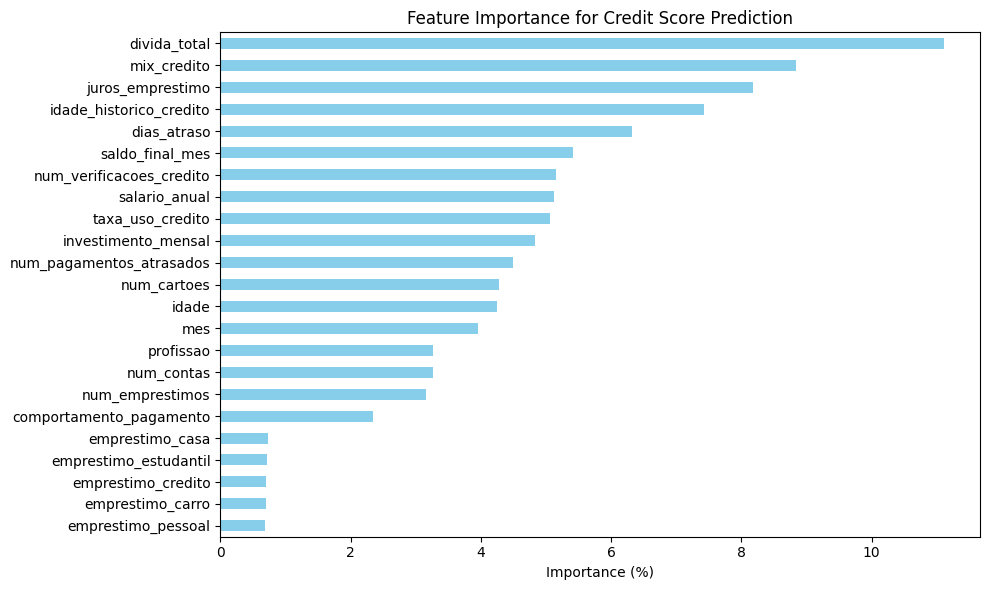

In [16]:
import matplotlib.pyplot as plt

importance.columns = ['Importance (%)']

# Sort and plot
importance.sort_values(by='Importance (%)', ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)

# Add chart title and axis label
plt.title('Feature Importance for Credit Score Prediction')
plt.xlabel('Importance (%)')
plt.tight_layout()
plt.show()